In [1]:
import csv

# LOADS DATASET AS A LIST OF DICTIONARIES
def load_csv(filename):
    with open(filename, "r") as file:
        reader = csv.DictReader(file)
        dataset = [row for row in reader]  # EACH ROW AS A DICTIONARY
    return dataset

# Load the dataset
filename = "/content/final_scaled_df.csv"  # USING THE DATASET THAT IS SCALED NORMALLY
dataset = load_csv(filename)
print(dataset[:3])


[{'winery': 'Pago de Carraovejas', 'wine': 'El Anejon', 'year': '2016', 'rating': '0.9999999999999991', 'num_reviews': '0.38201246660730187', 'country': 'Espana', 'region': 'Ribera del Duero', 'price': '0.43241484052939905', 'type': 'Ribera Del Duero Red', 'body': '1.0', 'acidity': '0.0'}, {'winery': 'Pago de Carraovejas', 'wine': 'Cuesta de Las Liebres', 'year': '2015', 'rating': '0.9999999999999991', 'num_reviews': '0.30899376669634904', 'country': 'Espana', 'region': 'Ribera del Duero', 'price': '0.6972445215881969', 'type': 'Ribera Del Duero Red', 'body': '1.0', 'acidity': '0.0'}, {'winery': 'Bodegas El Nido', 'wine': 'El Nido', 'year': '2018', 'rating': '0.9999999999999991', 'num_reviews': '0.17097061442564557', 'country': 'Espana', 'region': 'Jumilla', 'price': '0.8250265981803168', 'type': 'Red', 'body': '0.5', 'acidity': '0.0'}]


In [2]:
# SPLITTING DATASET USING HASHING
import hashlib

def train_test_split_hash(dataset, test_size=0.2):

    def hash_row(row):
        return int(hashlib.md5(str(row).encode()).hexdigest(), 16) % 100  # Converting to 0-99 scale

    split_threshold = test_size * 100
    test_set = [row for row in dataset if hash_row(row) < split_threshold]
    train_set = [row for row in dataset if row not in test_set]

    return train_set, test_set
train_data, test_data = train_test_split_hash(dataset, test_size=0.25)

# Print dataset sizes
print(f"Total Samples: {len(dataset)}")
print(f"Training Samples: {len(train_data)}")
print(f"Testing Samples: {len(test_data)}")


Total Samples: 1398
Training Samples: 1062
Testing Samples: 336


In [3]:
train_ratio = len(train_data) / len(dataset)
test_ratio = len(test_data) / len(dataset)

print(f"Training Set Ratio: {train_ratio:.2f}")
print(f"Testing Set Ratio: {test_ratio:.2f}")


Training Set Ratio: 0.76
Testing Set Ratio: 0.24


In [4]:
def save_csv(filename, data):
    """Saves list of dictionaries into a CSV file."""
    if len(data) == 0:
        print(f"Warning: No data to save in {filename}")
        return

    fieldnames = data[0].keys()  # Extracts column names

    with open(filename, "w", newline="") as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# Save train and test sets
save_csv("/content/wines_SPA_train.csv", train_data)
save_csv("/content/wines_SPA_test.csv", test_data)

print("Train and test datasets saved successfully!")


Train and test datasets saved successfully!


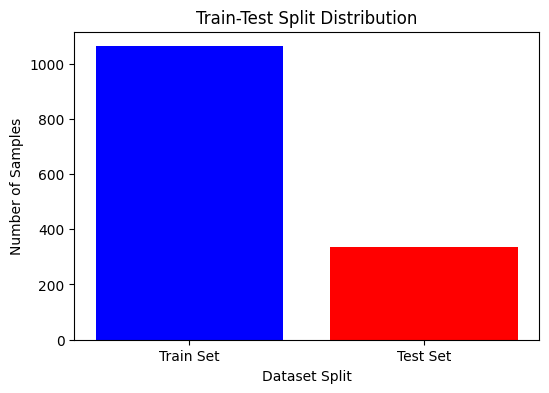

In [7]:
# VERIFYING THE SPLITS
import matplotlib.pyplot as plt

#BAR CHART FOR TRAIN TEST SPLITS
labels = ['Train Set', 'Test Set']
sizes = [len(train_data), len(test_data)]

plt.figure(figsize=(6, 4))
plt.bar(labels, sizes, color=['blue', 'red'])
plt.xlabel("Dataset Split")
plt.ylabel("Number of Samples")
plt.title("Train-Test Split Distribution")
plt.show()
